# Data Mining for Business Analytics

## Model Evaluation Measures - Pt. 2

Spring 2019 - Prof. George Valkanas

Material based on content courtesy of Prof. Foster Provost

***

In [1]:
# Import the libraries we will be using
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

### Confusion Matrix

Just as a reminder, a confusion matrix looks like this

<br/>
<table width="60%">
    <tbody>
        <tr style="background: rgba(255, 255, 255, 0.1)">
            <td colspan="2" width="30%"></td>
            <td colspan="2" style="border: 2px solid black; background: white; text-align: center" ><b>True Class</b></td>
        </tr>
        <tr style="background: rgba(255, 255, 255, 0.1)">
            <td colspan="2"></td>
            <td style="border: 2px solid black; background: #E8E8E8; text-align: center"><b>Positive (1)</b></td>
            <td style="border: 2px solid black; background: #E8E8E8; text-align: center"><b>Negative (0)</b></td>
        </tr>
        <tr>
            <td rowspan="2" style="border: 2px solid black; background: white; text-align: center"><b>Predicted<br/>Class</b></td>
            <td style="border: 2px solid black; background: #E8E8E8; text-align: center"><b>Positive<br/>("Yes")</b></td>
            <td style="border: 2px solid black; background: lightgreen; text-align: center">
                <b>True Positive (TP)</b>
            </td>
            <td style="border: 2px solid black; background: #ff9999; text-align: center">
                <b>False Positive (FP)</b>
            </td>
        </tr>
        <tr>
            <td style="border: 2px solid black; background: #E8E8E8; text-align: center; text-align: center">
                <b>Negative<br/>("No")</b>
            </td>
            <td style="background: #ff9999; border: 2px solid black; text-align: center">
                <b>False Negative (FN)</b>
            </td>
            <td style="background: lightgreen; border: 2px solid black; text-align: center">
                <b>True Negative (TN)</b>
            </td>
        </tr>
    </tbody>
</table>


We've already seen the _Cumulative Response Curve_ (CRC) and the process that we use to generate it. There are several other curves that we can use to evaluate a model. Some of them are quite similar to the CRC, whereas others differ more.
***

### Some Additional Measures

To produce the extra curves, we must first introduce some additional measures, which we can build from our confusion matrix.

* **True Positive Rate (TPR):** Also known as <u>_recall_</u> is the portion of actually true instances ("truely" to the positive class) that were classified / captured / identified as such. To compute TPR, we use the "Positive (1)" column of our confusion matrix. Formally:

$$ TPR = \frac{TP}{TP + FN} $$

<br/>

* **False Positive Rate (FPR):** Roughly speaking, how likely we are to _misclassify_ a "truely" negative instance as a positive one. To compute FPR, we use the "Negative (0)" column of our confusion matrix. Formally:

$$ FPR = \frac{FP}{FP + TN}$$


**VERY IMPORTANT**: As you can see from the previous quantities, TPR and FPR use values from our _confusion matrix_. What does that mean, with respect to a classifier? Recall that our models are _scoring models_ !
***

### The ROC  


_Not to be confused with [The Rock](https://www.imdb.com/name/nm0425005/)!_


The Receiver Operating Characteristic (ROC) Curve uses the two measures that we introduced above: **FPR** and **TPR**.
It helps us to visualize the _trade-offs_ between the **opportunity for benefits** (via true positives on the y-axis) and the **possibility of costs** (via false positives on the x-axis).

The ROC _also_ expects our predictions to be _ordered_ according to their probability estimates. Let's briefly examine how it works.

<img src="images/ROC1.png" alt="Drawing" style="width: 600px;"/>


The four corners of an ROC curve:

* **(0, 0):** Represents the strategy of never issuing a positive classification
* **(0, 1):** Represents **perfect classification**, i.e. everything is classified to the class it really belongs! 
* **(1, 0):** We somehow managed to get _everything_ wrong!?
* **(1, 1):** Always issue positive classification (example: "everyone's pregnant!")

The diagonal line between **(0, 0)** and **(1, 1)** represents a randomly guessing "classifier" (e.g., flipping a weighted coin).

- _Provost, Foster, and Tom Fawcett. Data Science for Business: _
  _What you need to know about data mining and data-analytic thinking. O'Reilly Media, Inc., 2013._


<img src="images/ROC2.png" alt="Drawing" style="width: 600px;"/>

***

### ROC AUC

Finally, we can measure the _Area Under the (ROC) Curve_ (ROC AUC), which is the fraction of the total area below our classifier's ROC curve.
_Remember:_ Despite its simplicity, you should approach the AUC just like any other evaluation measures: whether it's the right thing to use depends on your business application and domain!

Let's go back to our mailing campaign example and compute the AUC there!

In [2]:
original = pd.read_csv("data/mailing.csv")  # Load the data
original.head()  # Let's take a look at the data

,Income,Firstdate,Lastdate,Amount,rfaf2,rfaa2,pepstrfl,glast,gavr,class
0,3,9409,9509,0.06,1,G,0,50,30.00,0
1,2,9201,9602,0.16,4,G,X,20,20.55,1
2,0,9510,9603,0.20,4,E,0,5,8.75,0
3,6,9409,9603,0.13,2,G,0,25,22.50,0
4,0,9310,9511,0.10,1,G,0,25,12.50,0


### Dummysize the data
Check our other notebook for details why we are doing this.

In [3]:
data = original.copy()
for field in ['rfaa2', 'pepstrfl']:  # Do the same thing for the two fields of interest
    # Go through each possible value 
    for value in data[field].unique():
        # Create a new binary field
        data[field + "_" + value] = pd.Series(data[field] == value, dtype=int)

    # Drop the original field
    data = data.drop([field], axis=1)
    
# Let's look at the data again, after the modifications
data.head()

,Income,Firstdate,Lastdate,Amount,rfaf2,glast,gavr,class,rfaa2_G,rfaa2_E,rfaa2_F,rfaa2_D,pepstrfl_0,pepstrfl_X
0,3,9409,9509,0.06,1,50,30.00,0,1,0,0,0,1,0
1,2,9201,9602,0.16,4,20,20.55,1,1,0,0,0,0,1
2,0,9510,9603,0.20,4,5,8.75,0,0,1,0,0,1,0
3,6,9409,9603,0.13,2,25,22.50,0,1,0,0,0,1,0
4,0,9310,9511,0.10,1,25,12.50,0,1,0,0,0,1,0


Let's createa a _new_ feature that may be _more_ useful.

In [4]:
# The "data" dataframe contains everything together.
# Let's be picky this time w.r.t. the features that we'll use
data['date_diff'] = 1 + (data['Lastdate'] - data['Firstdate'])
X = data[['Income', 'Amount', 'rfaf2', 'glast', 'gavr', 'date_diff']]
Y = data['class']

Split the features and labels into a training and testing subset. We'll use 75% for training and the rest for testing.

In [5]:
# Keep 75% of the data for training and 25% for testing. We have used this method before.
X_mailing_train, X_mailing_test, Y_mailing_train, Y_mailing_test = train_test_split(X, Y, train_size=.75)

C:\Users\ashle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


We will start simple, with a Logistic Regression classifier. These are the steps we must take:
1. Train the classifier (on the training data)
1. Use the classifier on the _test_ data and get the _probabilities_ that an instance belongs to the _positive_ class.
1. Get the $FPR$ and $TPR$ quantities to generate the AUC value (definitions earlier in this notebook). To do so, use:
    1. The probabilities returned by the classifier in the previous step.
    1. The _true labels_ of the test ( **why the test set** ? )
    1. The `metrics.roc_curve()` method
1. Use the `roc_auc_score()` method to generate the AUC value
1. Plot the ROC curve, with $FPR$ on the x-axis and $TPR$ on the y-axis.
    1. For convenience, we'll 

In [6]:
# Step 1: Train the logistic regression model
model = LogisticRegression()
model.fit(X_mailing_train, Y_mailing_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
# Step 2: For each instance in the TEST DATA, get the probability that it belongs to the POSITIVE class (LEAVE=1)
Y_test_probability_1 = model.predict_proba(X_mailing_test)[:, 1]

In [8]:
# Step 3: Use the roc_curve method to generate FPR and TPR
fpr, tpr, thresholds = metrics.roc_curve(Y_mailing_test, Y_test_probability_1)

In [9]:
# Step 4: Compute the AUC for the ROC
auc = metrics.roc_auc_score(Y_mailing_test, Y_test_probability_1)

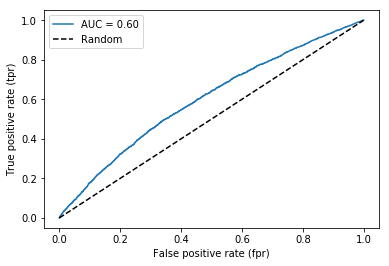

In [10]:
# Step 5: Plot the ROC curve. Report the AUC in the legend
plt.plot(fpr, tpr, label="AUC = %.2f" % round(auc, 2))
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)

### Exercise
Generate the same plot for different classifiers. Do you get better performance? Worse?

### The Lift Curve

The ROC Curve has been a fundamental tool in evaluating the performance of classifiers, for a number of reasons. (can you think of any?).

A potential downside is that **FPR** and **TPR** may be tricky quantities to express / explain in a business setting. The CRC is perhaps more "approachable".

Another type of curve that we often user is known as the **Lift Curve**. It tells us _how much better_ is one model with respect to another. To compute our Lift Curve, we will start with our CRC.

In [11]:

# Let's switch gears again and see what happens if we use all the features
X = data.drop(['class'], axis=1)

# Keep 75% of the data for training and 25% for testing. We have used this method before.
X_mailing_train, X_mailing_test, Y_mailing_train, Y_mailing_test = train_test_split(X, Y, train_size=.75)

C:\Users\ashle\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:

# Let's create a method that trains and returns the CRC of a clasifier

def train_and_compute_crc( model, x_train, y_train, x_test, y_test):

    # Train the model
    model.fit(x_train, y_train)

    # Let's get the probabilities. FOCUS ON THE POSITIVE CLASS
    probabilities = model.predict_proba(x_test)[:, 1]

    # Create a dataframe that we can conveniently manipulate
    model_df = pd.DataFrame(list(zip(probabilities, y_test)), columns=["PROBABILITY", "TRUE_CLASS"])

    # Sort the dataframe rows by the PROBABILITY
    model_df_sorted = model_df.sort_values(by=['PROBABILITY'], ascending=False)

    # Compute the CUMULATIVE correct responses up until the
    return model_df_sorted["TRUE_CLASS"].cumsum()


In [13]:
# Let's train a few classifiers here and try to plot everything together.
model = LogisticRegression(C=100)
logReg10_crc = train_and_compute_crc( model, X_mailing_train, Y_mailing_train, X_mailing_test, Y_mailing_test )

model = DecisionTreeClassifier(criterion='entropy', max_depth=15)
dec_tree_crc = train_and_compute_crc( model, X_mailing_train, Y_mailing_train, X_mailing_test, Y_mailing_test )

In [14]:
# For the x-axis compute the fraction of instances we have seen so far
x_fraction = []
for i in range(len(X_mailing_test)):
    x_fraction.append( (i+1) / len(X_mailing_test) )
x_fraction = np.array(x_fraction)

In [15]:

# Compute the LIFT for the decision tree.
# a) Normalize the CRC by the maximum value
# b) Divide each value by the fraction of items we have seen so far
dec_tree_lift = dec_tree_crc / np.max(dec_tree_crc)
dec_tree_lift = dec_tree_lift / x_fraction


# Compute the LIFT for the Logistic Regression.
# a) Normalize the CRC by the maximum value
# b) Divide each value by the fraction of items we have seen so far
log_reg_lift = logReg10_crc / np.max(logReg10_crc)
log_reg_lift = log_reg_lift / x_fraction

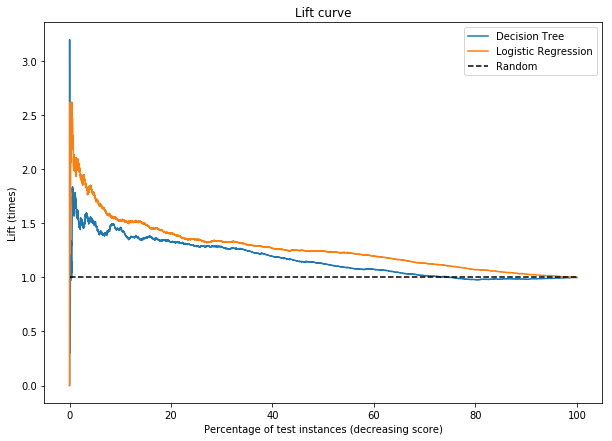

In [16]:

# Let's plot the information

plt.figure(figsize=(10,7))  # Create a big enough plot

plt.plot(x_fraction * 100, dec_tree_lift, label="Decision Tree")  # Show the LIFT curve for the Decision Tree

plt.plot(x_fraction * 100, log_reg_lift, label="Logistic Regression")  # Show the LIFT curve for Logistic Regression

plt.plot([0,100], [1,1], 'k--', label="Random")
plt.xlabel("Percentage of test instances (decreasing score)")
plt.ylabel("Lift (times)")
plt.title("Lift curve")
plt.legend()
plt.show()

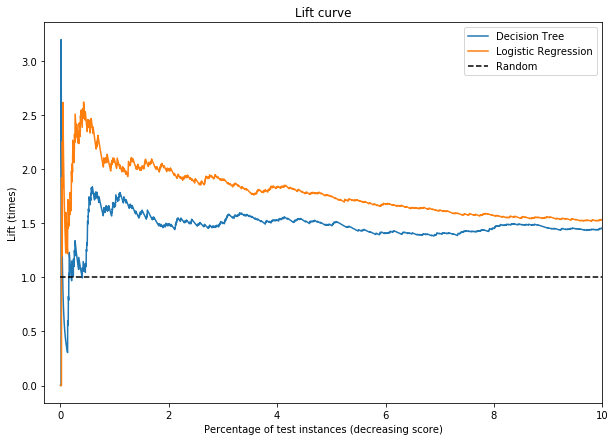

In [17]:

# Let's plot the information

plt.figure(figsize=(10,7))  # Create a big enough plot

plt.plot(x_fraction * 100, dec_tree_lift, label="Decision Tree")  # Show the LIFT curve for the Decision Tree

plt.plot(x_fraction * 100, log_reg_lift, label="Logistic Regression")  # Show the LIFT curve for Logistic Regression

plt.plot([0,100], [1,1], 'k--', label="Random")
plt.xlim(-0.3, 10)
plt.xlabel("Percentage of test instances (decreasing score)")
plt.ylabel("Lift (times)")
plt.title("Lift curve")
plt.legend()
plt.show()

**Question:** What can you tell me by looking at the above graph?
***

### Profit Curves

Finally, you should always remember that there is _evaluating the model_ and _evaluating the business_. The two may be linked in one way or another, but this connection has probably not been clear so far. So let's make this happen!

Let's generate a simple matrix like the one below.
**BE CAREFUL**: The matrix has the structure of a confusion matrix, _but it is not one!_

**Question:** Can you see why?

In [18]:
# How much do we gain by predicting the right individual ()
indiv_benefit = 17

# How much we lose if we predict the wrong individual (cost of sending out a flyer, without a positive response)
indiv_loss = -1

In [19]:

cost_matrix = pd.DataFrame([[indiv_benefit, indiv_loss], [0, 0]], 
                           columns=['(True) p', '(True) n'], 
                           index=['[Predicted] Y', '[Predicted] N'])
cost_matrix

,(True) p,(True) n
[Predicted] Y,17,-1
[Predicted] N,0,0


The above matrix is a _profit matrix_. It says what we _gain_ by targeting a customer that the classifier said that we should target (predicted = "Y").

We will basically combine our profit matrix with _each_ of our confusion matrices, i.e., for each threshold.

In [20]:
# Train a decision tree classifier with some parameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=15)
model.fit(X_mailing_train, Y_mailing_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
# For every instance in the test set, take the probability it will belong to class 1
model_probas = model.predict_proba(X_mailing_test)[:, 1]


In [22]:
# Get the false positive rate, true positive rate, and all thresholds
fpr, tpr, thresholds = metrics.roc_curve(Y_mailing_test, model_probas)


In [23]:
# What is the baseline probability of being positive or negative in the data set?

# The baseline is: # positive responses / # total number of responses
p_p = np.sum(Y_mailing_test)/len(Y_mailing_test)

p_n = 1 - p_p # According to our probabilities class...


In [24]:
# To estimate our profit we use our TRUE POSITIVES and we want to convert these to 
actual_profit = cost_matrix['(True) p']['[Predicted] Y'] * tpr * p_p

# To estimate our profit we use our FALSE POSITIVES
actual_cost = cost_matrix['(True) n']['[Predicted] Y'] * fpr * p_n


In [25]:
# Expected profits:
expected_profits = actual_profit + actual_cost


In [26]:

# We will use the thresholds here to compute how many users are above it
n_targeted = []
for t in thresholds:
    above_threshold = model_probas >= t
    above_thres_count = np.sum(above_threshold)
    n_targeted.append( above_thres_count )

# Turn these counts to percentages of users above the threshold
n_targeted = np.array(n_targeted) / len(Y_mailing_test)


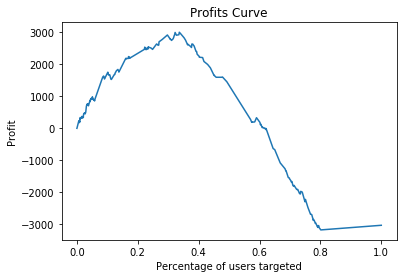

In [27]:
Size_targeted_pop = float(len(Y_mailing_test))

# Plot the profit curve
plt.plot(n_targeted, Size_targeted_pop*expected_profits)
plt.xlabel("Percentage of users targeted")
plt.ylabel("Profit")
plt.title("Profits Curve")
plt.show()


# # Let's compute the confusion matrix first.
# # To do that we need the actual classes and the predicted ones
# conf_mtx = metrics.confusion_matrix(Y_mailing_test, predictions, labels=[1, 0])

# # Let's turn the confusion matrix into a DataFrame, to make it more presentable
# conf_mtx_df = pd.DataFrame(conf_mtx.T, columns=[, ], index=[, '[Predicted] N'])
# conf_mtx_df